# Parcial 1
## Luccas Rojas 201923052
Al entregar la solución de este parcial, yo, Luccas Rojas con código 201923052 me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial

1. El enfoque analaitico que pienso darle al al proyecto es revisar cuales son las caracteristicas que mas influyen en el perfil de una persona dada y de este modo incluso poder llegar a predecir con cierto nivel de certeza a que perfil perteneceria una persona a partir de sus estudios en las diferentes areas

In [81]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix , classification_report, precision_score, recall_score, f1_score, accuracy_score
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt

#Imputadores
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Smote
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Seaborn
import seaborn as sns 
from sklearn import tree
#Importar utilities 
# import utilities as ut

# 1. Carga de datos

In [82]:
#Carga de datos

file_name = "data/Datos_proyecto_II_BI_2017.csv"
data=pd.read_csv(file_name, sep=',', encoding = 'ISO-8859-1', index_col=0)

C:\Users\luccas\AppData\Local\Temp\ipykernel_12452\1329743875.py:4: DtypeWarning: Columns (145,295,297,380,381,383,469,495,496,499,500,501,508,509,510,511) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(file_name, sep=',', encoding = 'ISO-8859-1', index_col=0)


In [83]:
# Cantidad de datos y número de variables
data.shape

(4727, 551)

In [84]:
data.duplicated().sum()

0

In [85]:
data =data[["NVCBP8A","NVCBP8G","NVCBP11AA","NVCBP11D","NVCBP14B","NVCBP14I","NHCCPCTRL2","NHCCP20","NHCCP23","NHCCP27","NHCCP31","NHCCP32","NHCCP36A","NHCCP40B","NHCCP40N","NPCFP14I","NVCBP14A"]]
data =data.rename(columns={"NPCFP14I":"ASMA"})

In [86]:
data.shape

(4727, 17)

In [87]:
#Descripción de los datos
data.describe()

,NVCBP8A,NVCBP8G,NVCBP11AA,NVCBP11D,NVCBP14B,NVCBP14I,NHCCPCTRL2,NHCCP20,NHCCP23,NHCCP27,NHCCP31,NHCCP32,NHCCP36A,NHCCP40B,NHCCP40N,ASMA,NVCBP14A
count,4727.000000,4727.00000,4717.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4721.000000,4533.0,4727.000000,4727.000000,4727.0,4727.000000
mean,1.777449,2.01502,2.576002,1.013962,1.910091,1.855722,3.574783,2.379733,1.023694,1.087794,1.029829,1.589917,1.0,1.076793,1.946901,1.0,1.843876
std,0.940223,0.82696,0.957760,0.117347,0.286082,0.351408,1.549529,0.958444,0.240497,0.661588,0.223840,0.803868,0.0,0.266291,0.224255,0.0,0.363012
min,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000
25%,1.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,1.0,2.000000
50%,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,1.0,2.000000
75%,2.000000,2.00000,3.000000,1.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.000000,2.000000,1.0,2.000000
max,9.000000,9.00000,6.000000,2.000000,2.000000,2.000000,12.000000,11.000000,5.000000,9.000000,6.000000,10.000000,1.0,2.000000,2.000000,1.0,2.000000


In [88]:
#Numero de personas con asma con valor 1
numero_filas_sin_asma = len(data[data['ASMA'] == 2])
print("Sin asma: ",numero_filas_sin_asma)
numero_filas_con_asma = len(data[data['ASMA'] == 1])
print("Con asma: ",numero_filas_con_asma)


Sin asma:  0
Con asma:  4727


# 2. Limpieza y preparacion de datos

## 2.1 Revisar los datos

Sacar las columnas categoricas y numericas para poder trabajar con ellas

In [89]:
data_clean = data.copy(deep=True)

In [90]:
#Se revisan las variables categoricas y numericas
numeric_cols = data_clean.select_dtypes(include=['int64', 'float64'])
categorical_cols = data_clean.select_dtypes(include=['object'])

### Unicidad de los datos

In [91]:
data_clean.duplicated().sum()

2914

### Completitud

In [92]:
#Revisar la cantidad de nulos
data_clean.isnull().sum()

NVCBP8A         0
NVCBP8G         0
NVCBP11AA      10
NVCBP11D        0
NVCBP14B        0
NVCBP14I        0
NHCCPCTRL2      0
NHCCP20         0
NHCCP23         0
NHCCP27         0
NHCCP31         0
NHCCP32         6
NHCCP36A      194
NHCCP40B        0
NHCCP40N        0
ASMA            0
NVCBP14A        0
dtype: int64

In [93]:
#Reviar porcentaje de nulos
data_clean.isnull().sum()*100 / data.shape[0]

NVCBP8A       0.000000
NVCBP8G       0.000000
NVCBP11AA     0.211551
NVCBP11D      0.000000
NVCBP14B      0.000000
NVCBP14I      0.000000
NHCCPCTRL2    0.000000
NHCCP20       0.000000
NHCCP23       0.000000
NHCCP27       0.000000
NHCCP31       0.000000
NHCCP32       0.126930
NHCCP36A      4.104083
NHCCP40B      0.000000
NHCCP40N      0.000000
ASMA          0.000000
NVCBP14A      0.000000
dtype: float64

### Consistencia

Se puede observar como hay varias columnas que contienen horas de -1, por lo que se podria entender que esa persona no tiene informacion al respecto de cuantas horas ha llegado a tomar

### Validez

In [94]:
possible_values = {i:'' for i in data_clean.columns if 'Unnamed' not in i}

for col in numeric_cols:
    possible_values[col] = f"[{data[col].min()}, {data[col].max()}]"

for col in categorical_cols:
    possible_values[col] = str(data[col].unique())

for k,v in possible_values.items():
    print(f"{k} : {v}")

NVCBP8A : [1, 9]
NVCBP8G : [1, 9]
NVCBP11AA : [0.0, 6.0]
NVCBP11D : [1, 2]
NVCBP14B : [1, 2]
NVCBP14I : [1, 2]
NHCCPCTRL2 : [1, 12]
NHCCP20 : [1, 11]
NHCCP23 : [1, 5]
NHCCP27 : [1, 9]
NHCCP31 : [1, 6]
NHCCP32 : [1.0, 10.0]
NHCCP36A : [1.0, 1.0]
NHCCP40B : [1, 2]
NHCCP40N : [1, 2]
ASMA : [1, 1]
NVCBP14A : [1, 2]


## 2.2 Casteo de datos y ajuste segun diccionario

Se castean los datos a su tipo de dato correspondiente

In [95]:

data_clean['HORAS_FRONTEND'] = data_clean['HORAS_FRONTEND'].replace('-1', np.nan)
for col in categorical_cols:
    data_clean[col] = data_clean[col].replace('?', np.nan)

columns_to_number = ["HORAS_BACKEND","HORAS_FRONTEND","NUM_CURSOS_BEGINNER_DATASCIENCE","NUM_CURSOS_BEGINNER_BACKEND","NUM_CURSOS_BEGINNER_FRONTEND","AVG_SCORE_DATASCIENCE","AVG_SCORE_BACKEND","AVG_SCORE_FRONTEND"]
for col in columns_to_number:
    data_clean[col] = data_clean[col].astype('float64')

KeyError: 'HORAS_FRONTEND'

Convierte todos los valores que no cumplen con el diccionaro a NaN

In [ ]:
# Convierte todos los valores de las columnas seleccionadas a NaN si {{}}
data_clean.loc[data_clean['HORAS_DATASCIENCE'] >= 500, 'HORAS_DATASCIENCE'] = np.nan

Aca revisamos nuevamente las variables que ya deberian estar dentro de los parametros normales

In [ ]:
possible_values = {i:'' for i in data_clean.columns if 'Unnamed' not in i}

for col in numeric_cols:
    possible_values[col] = f"[{data_clean[col].min()}, {data_clean[col].max()}]"

for col in categorical_cols:
    possible_values[col] = str(data_clean[col].unique())

for k,v in possible_values.items():
    print(f"{k} : {v}")

HORAS_DATASCIENCE : [0.0, 108.0]
HORAS_BACKEND : [ 43.  12.  31.  10.  19.  40.  63.  27.  39.  42.  38.  54.  51. 117.
   0.   8.  30.  33.  22.  71.  20.  44.  29.  32.  17.  23.  52.  36.
   4.  41.  25.  13.  nan  26.  28.  24.  45.  18.  15.  57.  35.  37.
  77.   1.  14.  47.   5.  49.  55.   6.  16.  48.  50.  61.  34.  11.
  21.  46. 111. 101.  99.  80.  58.  53.  75.  70.  78.  84.  91.  60.
  83.  89.  69.  67.  73.  56.  65.  92. 125. 121.  82.  68.  64.  86.
 108. 104.  94.  90.  74.  81.  72.  88.  96.  66.  85.  59.   7.  62.
   9.   2.  79. 120.  76.  87.  98.   3. 109.]
HORAS_FRONTEND : [  4.   6.  34.   9.  30.  15.  48.  23.  18.  27.   2.  49.   7.  12.
  32.  16.  59.  42.  33.  17.  24.  51.  19.  55.  47.  45.  20.  38.
  31.  44.  37.  46.  36.  50.  41.  57.  63.   0.  22.  62.  56.  10.
  43.  29.  69.  26.  13.  25.  60.  70.  35.  21.  66.  72.   8.  28.
  39.  64.  11.  54.  83.   5.  nan  40.  71.  52.  85.  53.  75.  76.
  77.  58.  73.  91.  14.  61.  65.

Revisamos nuevamente los tipos de dato

In [ ]:
data_clean.dtypes

HORAS_DATASCIENCE                  float64
HORAS_BACKEND                      float64
HORAS_FRONTEND                     float64
NUM_CURSOS_BEGINNER_DATASCIENCE    float64
NUM_CURSOS_BEGINNER_BACKEND        float64
NUM_CURSOS_BEGINNER_FRONTEND       float64
NUM_CURSOS_ADVANCED_DATASCIENCE    float64
NUM_CURSOS_ADVANCED_BACKEND          int64
NUM_CURSOS_ADVANCED_FRONTEND         int64
AVG_SCORE_DATASCIENCE              float64
AVG_SCORE_BACKEND                  float64
AVG_SCORE_FRONTEND                 float64
PERFIL                              object
dtype: object

Volver a sacar las variables categoricas y numericas para poder trabajar con ellas

In [ ]:
#Se revisan las variables categoricas y numericas
numeric_cols = data_clean.select_dtypes(include=['int64', 'float64'])
categorical_cols = data_clean.select_dtypes(include=['object'])
print("Numerical columns: ", numeric_cols.columns)
print("Categorical columns: ", categorical_cols.columns)

Numerical columns:  Index(['HORAS_DATASCIENCE', 'HORAS_BACKEND', 'HORAS_FRONTEND',
       'NUM_CURSOS_BEGINNER_DATASCIENCE', 'NUM_CURSOS_BEGINNER_BACKEND',
       'NUM_CURSOS_BEGINNER_FRONTEND', 'NUM_CURSOS_ADVANCED_DATASCIENCE',
       'NUM_CURSOS_ADVANCED_BACKEND', 'NUM_CURSOS_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],
      dtype='object')
Categorical columns:  Index(['PERFIL'], dtype='object')


## 2.3 Visualizacion de los datos

Primero borramos los datos duplicados

In [ ]:
data_clean = data_clean.drop_duplicates()
data_clean = data_clean.dropna()
#Reindexamos el data_frame
data_clean = data_clean.reset_index(drop=True)

Visualizacion de la relacion entre las variables

In [ ]:
# Visualizar relaciones entre variables numericas
graph_copy = data_clean.copy(deep=True)

# Crear el pairplot
# sns.pairplot(graph_copy[numeric_cols])

No logre presentar la grafica necesaria

Boxplot de las variables numéricas para revisar distribucion y outliers

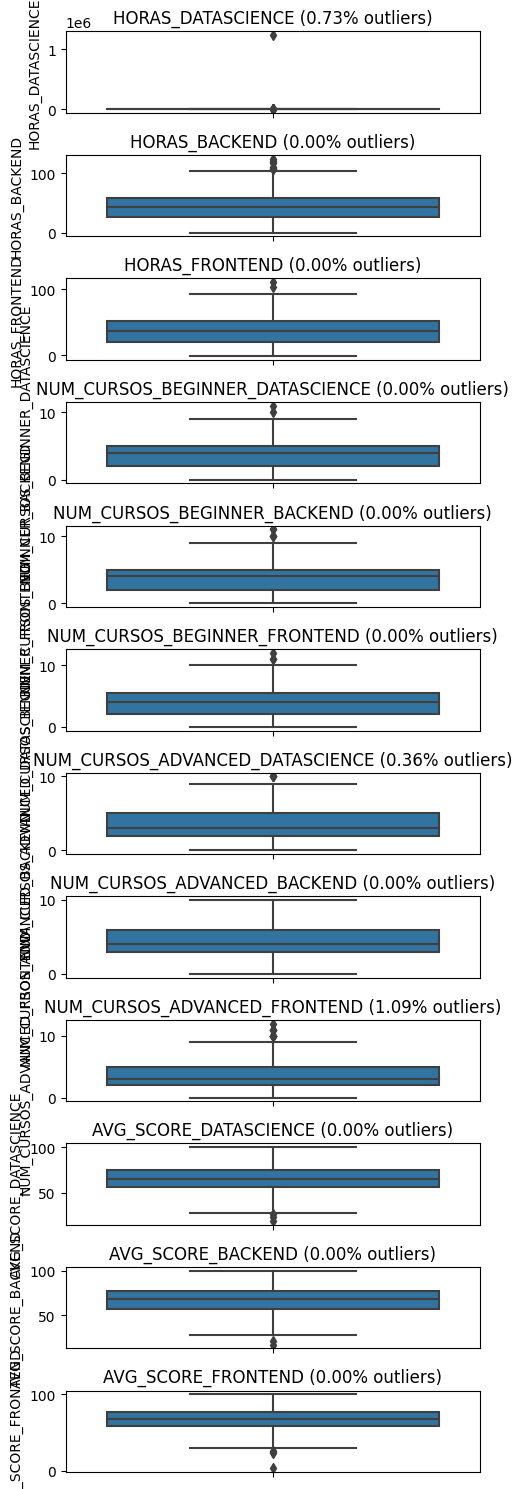

In [ ]:

graph_copy = data_clean.copy(deep=True)

fig, axes = plt.subplots(len(numeric_cols.columns), 1, figsize=(5, 15))

def calculate_outlier_percentage(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    percent_outliers = (len(outliers) / len(data)) * 100
    return percent_outliers

for i, col in enumerate(numeric_cols.columns):
    graph_copy = pd.to_numeric(data[col], errors='coerce')
    sns.boxplot(y=graph_copy, showfliers=True, ax=axes[i])
    outlier_percent = calculate_outlier_percentage(graph_copy)
    axes[i].set_title('{} ({:.2f}% outliers)'.format(col, outlier_percent))

plt.tight_layout()

## 2.4 Identificacion de variables y limpieza de datos 

Transformar las variables categoricas a numericas a traves de label encoder

In [ ]:
label_encoder = LabelEncoder()
columns = categorical_cols
label_dictionary = {}
for col in columns:
    data_clean[col] = label_encoder.fit_transform(data_clean[col])
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    label_dictionary[col] = mapping
print(label_dictionary)
data_clean.sample(10)

{'PERFIL': {'advanced_backend': 0, 'advanced_data_science': 1, 'advanced_front_end': 2, 'beginner_backend': 3, 'beginner_data_science': 4, 'beginner_front_end': 5}}


,HORAS_DATASCIENCE,HORAS_BACKEND,HORAS_FRONTEND,NUM_CURSOS_BEGINNER_DATASCIENCE,NUM_CURSOS_BEGINNER_BACKEND,NUM_CURSOS_BEGINNER_FRONTEND,NUM_CURSOS_ADVANCED_DATASCIENCE,NUM_CURSOS_ADVANCED_BACKEND,NUM_CURSOS_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PERFIL
599,0.0,10.0,35.0,0.0,5.0,5.0,1.0,4,5,69.0,63.0,54.0,3
413,66.0,48.0,40.0,1.0,6.0,4.0,7.0,8,1,68.0,85.0,73.0,4
806,79.0,25.0,55.0,3.0,4.0,6.0,0.0,8,1,53.0,52.0,34.0,1
545,37.0,54.0,12.0,5.0,3.0,4.0,5.0,3,2,73.0,55.0,59.0,3
695,57.0,53.0,0.0,8.0,2.0,5.0,4.0,7,3,55.0,62.0,70.0,1
602,44.0,38.0,57.0,3.0,4.0,1.0,3.0,8,1,75.0,55.0,77.0,3
106,47.0,19.0,24.0,3.0,5.0,1.0,4.0,1,3,62.0,73.0,60.0,5
865,28.0,62.0,38.0,3.0,3.0,6.0,0.0,4,5,66.0,60.0,85.0,1
497,47.0,25.0,50.0,0.0,2.0,8.0,5.0,6,0,65.0,100.0,74.0,4
78,35.0,23.0,29.0,1.0,5.0,1.0,4.0,8,4,81.0,49.0,58.0,5


Markar todos los outliers como nan

In [ ]:
for col_name in numeric_cols:
            Q1 = data_clean[col_name].quantile(0.25)
            Q3 = data_clean[col_name].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            data_clean.loc[(data_clean[col_name] < lower_limit) | (data_clean[col_name] > upper_limit), col_name] = np.nan

Mostrar porcentaje de datos nulos

In [ ]:
data_clean.isnull().sum()*100 / data.shape[0]

HORAS_DATASCIENCE                  0.638104
HORAS_BACKEND                      0.546946
HORAS_FRONTEND                     0.182315
NUM_CURSOS_BEGINNER_DATASCIENCE    0.182315
NUM_CURSOS_BEGINNER_BACKEND        0.455789
NUM_CURSOS_BEGINNER_FRONTEND       0.273473
NUM_CURSOS_ADVANCED_DATASCIENCE    0.364631
NUM_CURSOS_ADVANCED_BACKEND        0.000000
NUM_CURSOS_ADVANCED_FRONTEND       1.002735
AVG_SCORE_DATASCIENCE              0.182315
AVG_SCORE_BACKEND                  0.091158
AVG_SCORE_FRONTEND                 0.273473
PERFIL                             0.000000
dtype: float64

Imputar los datos con Iterative imputer

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(data_clean)
data_clean = pd.DataFrame(imputer.transform(data_clean), columns=data_clean.columns)

Mostrar los datos que quedan como nan despues de imputar

In [ ]:
data_clean.isnull().sum()*100 / data.shape[0]

HORAS_DATASCIENCE                  0.0
HORAS_BACKEND                      0.0
HORAS_FRONTEND                     0.0
NUM_CURSOS_BEGINNER_DATASCIENCE    0.0
NUM_CURSOS_BEGINNER_BACKEND        0.0
NUM_CURSOS_BEGINNER_FRONTEND       0.0
NUM_CURSOS_ADVANCED_DATASCIENCE    0.0
NUM_CURSOS_ADVANCED_BACKEND        0.0
NUM_CURSOS_ADVANCED_FRONTEND       0.0
AVG_SCORE_DATASCIENCE              0.0
AVG_SCORE_BACKEND                  0.0
AVG_SCORE_FRONTEND                 0.0
PERFIL                             0.0
dtype: float64

Revisar tamanio de los datos

In [ ]:
data_clean.shape

(1036, 13)

Borrar las filas nulas o borrar duplicados

In [ ]:
# Eliminación registros con ausencias
data_clean = data_clean.dropna()
# Eliminación de registros duplicados.
data_clean = data_clean.drop_duplicates()

data_clean.shape

(1036, 13)

# 3. Modelamiento

Separacion entrenamiento test

In [ ]:
y_col = "PERFIL"
Y = data_clean[y_col]
X = data_clean.drop([y_col,"PERFIL"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Ver balanceo de columna resultante

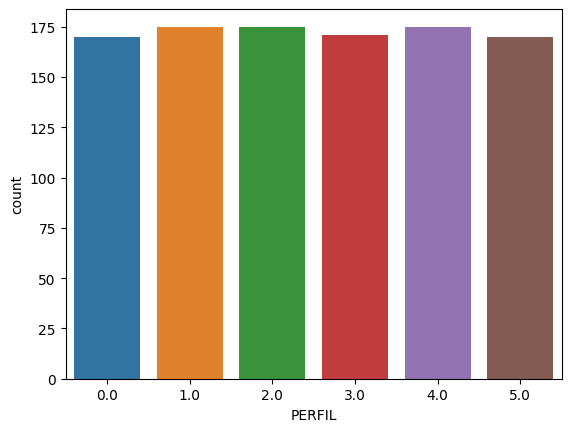

In [ ]:
ax = sns.countplot(x=y_col, data=data_clean)

Smote para balancear los datos

Shape of X before SMOTE: (1036, 12)
Hape of X after SMOTE: (870, 12)

Balance of positive and negative classes (%):


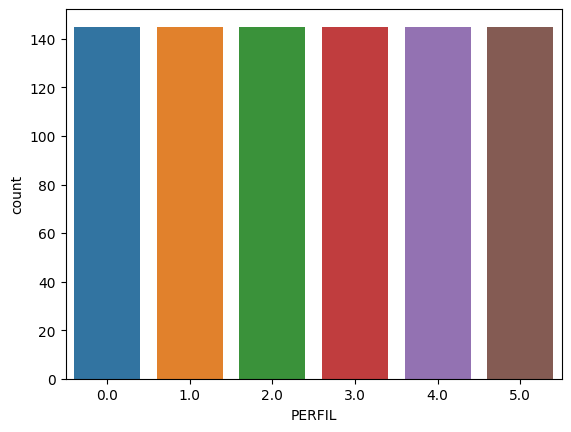

In [ ]:
sm = SMOTE(random_state=0)

X_sm, Y_sm = sm.fit_resample(X_train,Y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Hape of X after SMOTE: {X_sm.shape}''')
print("\nBalance of positive and negative classes (%):")
Y_sm.value_counts(normalize=True)*100
data_clean = pd.concat([X_sm, Y_sm], axis=1)
ax = sns.countplot(x=y_col, data=pd.DataFrame(Y_sm, columns=[y_col]))

In [ ]:
data_clean.sample(10)

,HORAS_DATASCIENCE,HORAS_BACKEND,HORAS_FRONTEND,NUM_CURSOS_BEGINNER_DATASCIENCE,NUM_CURSOS_BEGINNER_BACKEND,NUM_CURSOS_BEGINNER_FRONTEND,NUM_CURSOS_ADVANCED_DATASCIENCE,NUM_CURSOS_ADVANCED_BACKEND,NUM_CURSOS_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PERFIL
809,50.0,66.0,25.0,6.0,3.0,6.0,5.0,5.0,5.0,53.0,60.0,82.000000,1.0
730,55.0,35.0,55.0,3.0,5.0,3.0,5.0,5.0,3.0,45.0,50.0,51.000000,1.0
343,50.0,43.0,4.0,1.0,6.0,4.0,1.0,3.0,3.0,74.0,59.0,53.000000,5.0
688,47.0,16.0,8.0,4.0,0.0,4.0,3.0,4.0,2.0,78.0,59.0,66.000000,5.0
283,56.0,77.0,12.0,4.0,3.0,3.0,5.0,10.0,4.0,67.0,49.0,78.000000,1.0
375,38.0,47.0,10.0,4.0,4.0,7.0,4.0,0.0,8.0,96.0,83.0,56.000000,0.0
709,30.0,44.0,39.0,3.0,6.0,6.0,3.0,6.0,2.0,34.0,68.0,61.985948,2.0
247,0.0,20.0,27.0,3.0,4.0,4.0,6.0,3.0,4.0,81.0,82.0,75.000000,3.0
145,52.0,12.0,52.0,3.0,4.0,3.0,0.0,3.0,3.0,47.0,68.0,48.000000,2.0
669,52.0,0.0,69.0,3.0,5.0,3.0,6.0,8.0,4.0,65.0,56.0,82.000000,5.0


In [ ]:
data_clean.isnull().sum()*100 / data.shape[0]

HORAS_DATASCIENCE                  0.0
HORAS_BACKEND                      0.0
HORAS_FRONTEND                     0.0
NUM_CURSOS_BEGINNER_DATASCIENCE    0.0
NUM_CURSOS_BEGINNER_BACKEND        0.0
NUM_CURSOS_BEGINNER_FRONTEND       0.0
NUM_CURSOS_ADVANCED_DATASCIENCE    0.0
NUM_CURSOS_ADVANCED_BACKEND        0.0
NUM_CURSOS_ADVANCED_FRONTEND       0.0
AVG_SCORE_DATASCIENCE              0.0
AVG_SCORE_BACKEND                  0.0
AVG_SCORE_FRONTEND                 0.0
PERFIL                             0.0
dtype: float64

Eleccion automatica de los mejores hiperparametros

In [ ]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
param_tree = {'criterion':['gini', 'entropy'],'max_depth':[16,17,18,19],'min_samples_split':[2, 3, 4, 5]}



Entrenamiento de algoritmo de arbol de decision

In [ ]:
# data_clean=(data_clean-data_clean.min())/(data_clean.max()-data_clean.min())

model = DecisionTreeClassifier(criterion='entropy',max_depth = 7)
model = GridSearchCV(model, param_tree, cv=particiones)

model = model.fit(X_train,Y_train)

Presentar las mejores variables para el modelo

In [ ]:
#Revisar los mejores parametros
model.best_params_

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2}

# 4. Evaluacion del modelo

Prediccion de datos con el algoritmo

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[3. 2. 4. 5. 4. 1. 5. 1. 0. 0. 1. 5. 5. 0. 3. 1. 3. 0. 1. 5. 4. 2. 0. 5.
 5. 2. 1. 0. 1. 3. 4. 5. 4. 0. 3. 3. 3. 5. 1. 3. 5. 4. 4. 0. 0. 2. 5. 0.
 4. 4. 4. 4. 3. 0. 3. 1. 1. 0. 3. 5. 1. 3. 0. 5. 5. 1. 3. 5. 0. 3. 5. 0.
 0. 2. 2. 3. 5. 1. 2. 3. 3. 5. 2. 3. 2. 3. 1. 5. 4. 2. 3. 4. 1. 0. 2. 5.
 4. 0. 2. 0. 0. 1. 3. 2. 2. 0. 4. 3. 1. 0. 3. 0. 5. 1. 5. 3. 1. 3. 1. 0.
 5. 1. 2. 5. 1. 0. 0. 1. 1. 0. 3. 4. 1. 2. 3. 2. 1. 5. 0. 1. 3. 3. 5. 1.
 3. 3. 2. 4. 3. 2. 3. 2. 3. 2. 1. 3. 4. 4. 2. 0. 3. 5. 1. 1. 2. 1. 3. 3.
 4. 5. 1. 5. 0. 3. 5. 5. 1. 2. 4. 0. 1. 1. 2. 1. 4. 3. 3. 3. 4. 1. 0. 2.
 3. 4. 3. 4. 1. 2. 3. 3. 1. 5. 2. 4. 4. 3. 1. 1.]


Se genera la matriz de confusion

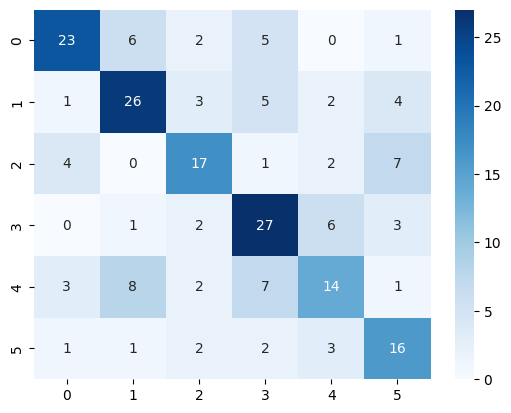

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

Se generan las metricas de evaluacion para el modelo de clasificacion

In [ ]:
# Exactitud = (Vp+Vn)/Total
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
#Recall = (VP)/(Vp+Fn)
# print("Recall: {}".format(recall_score(Y_test,y_pred)))
#Precisio = VP/(VP+VN)
# print("Precisión: {}".format(precision_score(Y_test,y_pred)))
#  f1
# print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.59


Se miran las clases mas relevantes para el arbol de decision


In [ ]:
importancia= model.best_estimator_.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,HORAS_BACKEND,0.121820
1,AVG_SCORE_DATASCIENCE,0.103096
2,NUM_CURSOS_BEGINNER_BACKEND,0.099758
3,AVG_SCORE_FRONTEND,0.096539
4,HORAS_FRONTEND,0.089602
5,HORAS_DATASCIENCE,0.088372
6,NUM_CURSOS_BEGINNER_FRONTEND,0.078656
7,AVG_SCORE_BACKEND,0.074142
8,NUM_CURSOS_BEGINNER_DATASCIENCE,0.073309
9,NUM_CURSOS_ADVANCED_DATASCIENCE,0.071169


Presentacion del arbol obtenido

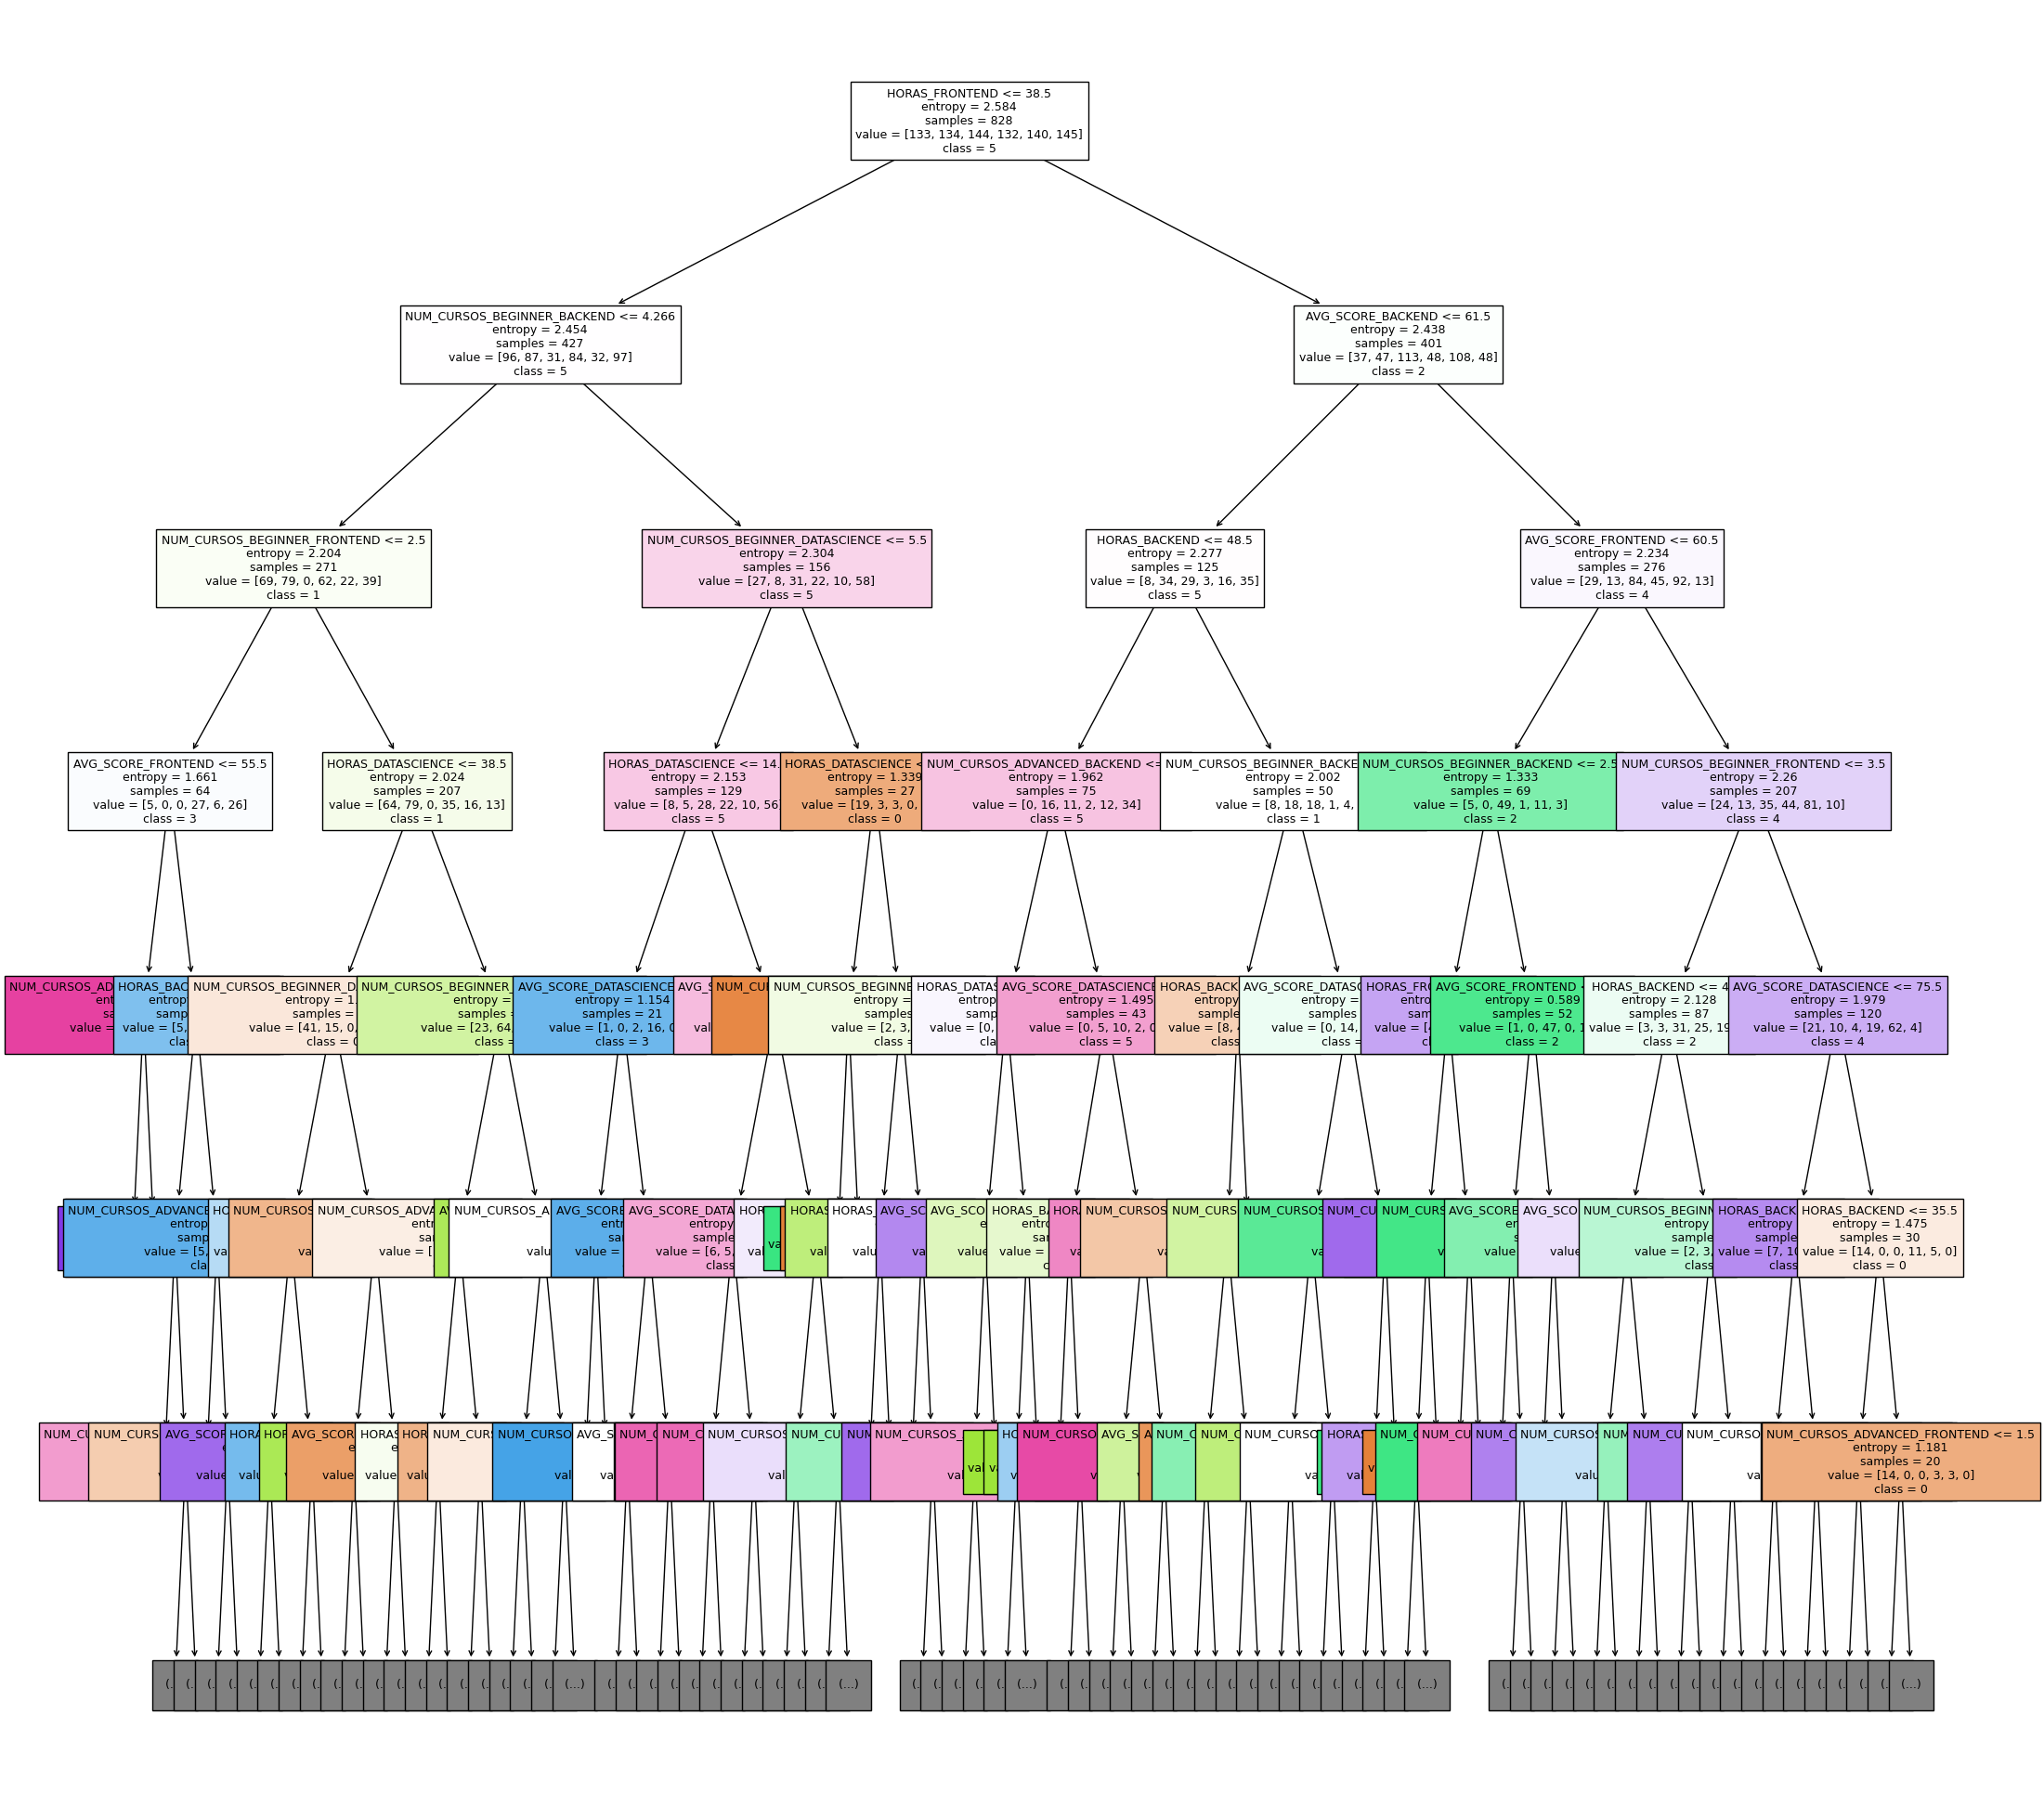

In [ ]:
tree_model = model.best_estimator_
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(tree_model, max_depth=6, feature_names=X.columns, class_names=["0", "1","2","3","4","5"], filled=True, fontsize=9) 

Este modelo lo podria utilizar la organizacion para poder verificar si un tipo de persona es mas propenso a tener un perfil  o no, y de esta manera poder hacer un mejor manejo de los recursos humanos de la organizacion, ademas, se podria evaluar las variables mas pertinentes para la empresa, dado cierto perfil analizando el abrol de decision. En este caso en especial podemos observar como las varibles que parecen ser mas pertinentes son las horas como backend, el puntaje como datascience, el numero de cursos de backend y el puntaje promedio de frontend como se pudo observar en el arbol de decision y sus variables mas relevantes.